# Exp2：基于回归分析的大学综合得分预测
---

## 一、案例简介
大学排名是一个非常重要同时也极富挑战性与争议性的问题，一所大学的综合实力涉及科研、师资、学生等方方面面。目前全球有上百家评估机构会评估大学的综合得分进行排序，而这些机构的打分也往往并不一致。在这些评分机构中，世界大学排名中心（Center for World University Rankings，缩写CWUR）以评估教育质量、校友就业、研究成果和引用，而非依赖于调查和大学所提交的数据著称，是非常有影响力的一个。

本任务中我们将根据 CWUR 所提供的世界各地知名大学各方面的排名（师资、科研等），一方面通过数据可视化的方式观察不同大学的特点，另一方面希望构建机器学习模型（线性回归）预测一所大学的综合得分。

## 二、作业说明
使用来自 Kaggle 的[数据](https://www.kaggle.com/mylesoneill/world-university-rankings?select=cwurData.csv)，构建「线性回归」模型，根据大学各项指标的排名预测综合得分。

**基本要求：**
* 按照 8:2 随机划分训练集测试集，用 RMSE 作为评价指标，得到测试集上线性回归模型的 RMSE 值；
* 对线性回归模型的系数进行分析。

**扩展要求：**
* 对数据进行观察与可视化，展示数据特点；
* 尝试其他的回归模型，对比效果；
* 尝试将离散的地区特征融入线性回归模型，并对结果进行对比。

**注意事项：**
* 基本输入特征有 8 个：`quality_of_education`, `alumni_employment`, `quality_of_faculty`, `publications`, `influence`, `citations`, `broad_impact`, `patents`；
* 预测目标为`score`；
* 可以使用 sklearn 等第三方库，不要求自己实现线性回归；
* 需要保留所有数据集生成、模型训练测试的代码；

## 三、数据概览

假设数据文件位于当前文件夹，我们用 pandas 读入标准 csv 格式文件的函数`read_csv()`将数据转换为`DataFrame`的形式。观察前几条数据记录：

In [593]:
import pandas as pd
import numpy as np

data_df = pd.read_csv('./cwurData.csv')  # 读入 csv 文件为 pandas 的 DataFrame
data_df.head(3).T  # 观察前几列并转置方便观察

,0,1,2
world_rank,1,2,3
institution,Harvard University,Massachusetts Institute of Technology,Stanford University
region,USA,USA,USA
national_rank,1,2,3
quality_of_education,7,9,17
alumni_employment,9,17,11
quality_of_faculty,1,3,5
publications,1,12,4
influence,1,4,2
citations,1,4,2


去除其中包含 NaN 的数据，保留 2000 条有效记录。

In [594]:
data_df = data_df.dropna()  # 舍去包含 NaN 的 row
len(data_df)

2000

取出对应自变量以及因变量的列，之后就可以基于此切分训练集和测试集，并进行模型构建与分析。

In [595]:
feature_cols = ['quality_of_faculty', 'publications', 'citations', 'alumni_employment', 
                'influence', 'quality_of_education', 'broad_impact', 'patents']
X = data_df[feature_cols]
Y = data_df['score']
print(type(X))
X


<class 'pandas.core.frame.DataFrame'>


,quality_of_faculty,publications,citations,alumni_employment,influence,quality_of_education,broad_impact,patents
200,1,1,1,1,1,1,1.0,2
201,4,5,3,2,3,11,4.0,6
202,2,15,2,11,2,3,2.0,1
203,5,10,12,10,9,2,13.0,48
204,10,11,11,12,12,7,12.0,16
...,...,...,...,...,...,...,...,...
2195,218,926,812,567,845,367,969.0,816
2196,218,997,645,566,908,236,981.0,871
2197,218,830,812,549,823,367,975.0,824
2198,218,886,812,567,974,367,975.0,651


## 四、模型构建

（待完成）

将模型按8：2划分数据集和训练集

In [596]:
from sklearn.model_selection import train_test_split
all_y = Y.values
all_x = X.values
#print(type(all_y))

x_train, x_test, y_train, y_test = train_test_split(all_x, all_y, test_size = 0.2, random_state = 2022)

all_y.shape, all_x.shape, x_train.shape, x_test.shape, y_train.shape, y_test.shape

((2000,), (2000, 8), (1600, 8), (400, 8), (1600,), (400,))

### 使用最小二乘法求解

使用pytorch将数据转换成tensor

In [597]:
import torch
x_tensor = torch.tensor(x_train,dtype=torch.double)
y_tensor = torch.tensor(y_train, dtype = torch.double)
lable = torch.exp(y_tensor + torch.ones(y_tensor.shape) * (0 - y_tensor.min()))

e_tensor = torch.ones([x_tensor.shape[0],1]) # 生成[1600,1]的标准矩阵
x_tensor,y_tensor, lable, e_tensor

(tensor([[210., 653., 310.,  ..., 355., 596., 637.],
         [218., 971., 812.,  ..., 367., 837., 416.],
         [210., 896., 609.,  ..., 355., 897., 121.],
         ...,
         [210., 292., 406.,  ..., 355., 415.,  28.],
         [218., 353., 287.,  ..., 367., 318.,  60.],
         [210., 785., 800.,  ..., 355., 897., 737.]], dtype=torch.float64),
 tensor([45.7400, 44.1700, 44.8200,  ..., 48.6300, 46.5900, 44.4000],
        dtype=torch.float64),
 tensor([  5.5845,   1.1618,   2.2255,  ..., 100.4841,  13.0658,   1.4623],
        dtype=torch.float64),
 tensor([[1.],
         [1.],
         [1.],
         ...,
         [1.],
         [1.],
         [1.]]))

In [598]:
feature = torch.cat((x_tensor,e_tensor), 1) #链接偏移量与x（特征）矩阵
feature

tensor([[210., 653., 310.,  ..., 596., 637.,   1.],
        [218., 971., 812.,  ..., 837., 416.,   1.],
        [210., 896., 609.,  ..., 897., 121.,   1.],
        ...,
        [210., 292., 406.,  ..., 415.,  28.,   1.],
        [218., 353., 287.,  ..., 318.,  60.,   1.],
        [210., 785., 800.,  ..., 897., 737.,   1.]], dtype=torch.float64)

根据公式求出权重

In [599]:
b_pre = torch.mm(torch.mm(torch.inverse(torch.mm(torch.t(feature),feature)),torch.t(feature)),lable.view(1600,1))
print(list(b_pre))

[tensor([-2.7595e+20], dtype=torch.float64), tensor([7.1937e+18], dtype=torch.float64), tensor([5.2635e+18], dtype=torch.float64), tensor([-2.6534e+19], dtype=torch.float64), tensor([8.7693e+18], dtype=torch.float64), tensor([-9.6745e+18], dtype=torch.float64), tensor([-4.4543e+18], dtype=torch.float64), tensor([-5.3604e+18], dtype=torch.float64), tensor([6.4334e+22], dtype=torch.float64)]


将测试数据转换为矩阵

In [600]:
test_x_tensor = torch.tensor(x_test, dtype=torch.double)
test_e_tensor = torch.ones(test_x_tensor.shape[0]).view([len(test_x_tensor),1])
test_feature = torch.cat((test_x_tensor,test_e_tensor),1)
test_ans = torch.log(torch.mm(test_feature,b_pre))
test_feature,  test_ans

(tensor([[140.,   3.,   6.,  ...,  14.,  12.,   1.],
         [218., 236., 368.,  ..., 265., 797.,   1.],
         [210., 943., 406.,  ..., 703., 204.,   1.],
         ...,
         [218., 887., 645.,  ..., 781., 839.,   1.],
         [218., 225., 321.,  ..., 262., 443.,   1.],
         [140., 165., 283.,  ..., 176., 373.,   1.]], dtype=torch.float64),
 tensor([[ 2.5120e+22],
         [-5.3653e+21],
         [ 1.0484e+21],
         [-3.4156e+21],
         [-5.0689e+21],
         [ 4.0195e+21],
         [-8.0259e+21],
         [-7.2251e+21],
         [-1.2981e+22],
         [-3.2500e+21],
         [-1.1197e+22],
         [-1.0920e+21],
         [ 2.0146e+22],
         [-2.7174e+21],
         [-5.3801e+20],
         [ 7.6489e+21],
         [ 1.2342e+19],
         [-1.7693e+21],
         [-5.4605e+21],
         [-2.4621e+20],
         [ 5.8749e+22],
         [ 4.6187e+21],
         [-2.8346e+21],
         [-1.1118e+21],
         [ 6.1234e+22],
         [ 1.5129e+21],
         [-3.0715e+21

计算loss

In [601]:
loss = torch.tensor(y_test).view([400,1]) - test_ans
loss = torch.mm(torch.t(loss),loss)
loss

tensor([[1.1320e+47]], dtype=torch.float64)

计算RMSE（均方根误差）

In [602]:
RMSE = (loss.item()/len(lable))**0.5
RMSE

8.411269648507298e+21

计算 $R^2$

In [603]:
var = (torch.tensor(y_test)- torch.mean(torch.tensor(y_test))).view([-1,1])
var = torch.mm(torch.t(var),var)
R = 1-loss.item()/var.item()
R

-5.4802070803207813e+42

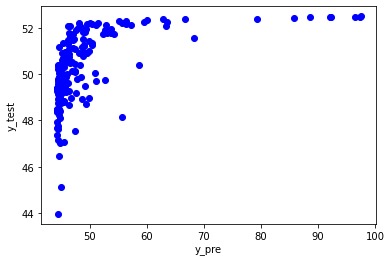

In [604]:
from matplotlib import pyplot as plt
from scipy.linalg import expm,logm
x = y_test
y = torch.log(test_ans)
plt.xlabel("y_pre")
plt.ylabel("y_test")
plt.plot(x,y,"ob")
plt.show()